In [83]:
import numpy as np
import pandas as pd 
import os
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set(style="whitegrid")
from matplotlib import rcParams
import matplotlib.pyplot as plt
from IPython import display
from ipywidgets import interact, widgets
%matplotlib inline
import scipy.stats

In [84]:
df1=pd.read_excel("COVID-19_Death_Counts_5_6_2020.xlsx") 
df2=pd.read_excel("COVID-19_Death_Counts_5_13_2020.xlsx")
df3=pd.read_excel("COVID-19_Death_Counts_5_28_2020.xlsx")
df4=pd.read_excel("COVID-19_Death_Counts_6_3_2020.xlsx")
df5=pd.read_excel("COVID-19_Death_Counts_6_10_2020.xlsx")
df6=pd.read_excel("COVID-19_Death_Counts_6_17_2020.xlsx")
df7=pd.read_excel("COVID-19_Death_Counts_6_24_2020.xlsx")
df8=pd.read_excel("COVID-19_Death_Counts_7_1_2020.xlsx")
df9=pd.read_excel("COVID-19_Death_Counts_7_8_2020.xlsx")
df10=pd.read_excel("COVID-19_Death_Counts_7_22_2020.xlsx")
df11=pd.read_excel("COVID-19_Death_Counts_7_29_2020.xlsx")

In [85]:
df1.head()

,Data as of,Start week,End Week,State,Sex,Age group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,2020-05-06,2020-02-01,2020-05-02,United States,All Sexes,Under 1 year,4.0,3951.0,36.0,1.0,11.0,50.0,NaN
1,2020-05-06,2020-02-01,2020-05-02,United States,All Sexes,1-4 years,2.0,780.0,33.0,2.0,33.0,66.0,NaN
2,2020-05-06,2020-02-01,2020-05-02,United States,All Sexes,5-14 years,4.0,1146.0,38.0,0.0,41.0,83.0,NaN
3,2020-05-06,2020-02-01,2020-05-02,United States,All Sexes,15-24 years,48.0,6843.0,143.0,18.0,41.0,211.0,NaN
4,2020-05-06,2020-02-01,2020-05-02,United States,All Sexes,25-34 years,317.0,14629.0,496.0,134.0,133.0,800.0,NaN


In [86]:
# rename all the columns in the excel file 
def rename(df):
    df.rename(columns={'Start week':'Start_week','End Week':'End_Week','Age group':'Age_group','COVID-19 Deaths':'COVID-19_Deaths',
                   'Total Deaths':'Total_Deaths','Pneumonia Deaths':'Pneumonia_Deaths','Pneumonia and COVID-19 Deaths':'Pneumonia_COVID-19_Deaths',
                     'Influenza Deaths':'Influenza_Deaths','Pneumonia, Influenza, or COVID-19 Deaths': 'P_I_C_deaths'}, inplace=True)
  


In [87]:
rename(df1)
rename(df2)
rename(df3)
rename(df4)
rename(df5)
rename(df6)
rename(df7)
rename(df8)
rename(df9)
rename(df10)
rename(df11)

In [88]:
dict_age={'Under 1 year':'less_than_1_year','1-4 years':'1_to_4','5-14 years':'5_to_14','15-24 years':'15_to_24',
       '25-34 years':'25_to_34', '35-44 years':'35_to_44', '45-54 years':'45_to_54', '55-64 years':'55_to_64',
       '65-74 years':'65_to_74', '75-84 years':'75_to_84', '85 years and over':'more_than_85','Female, all ages':'Female_all',
                                          'All ages':'All_age','Male, all ages':'Male_all','All Ages':'All_age'}

In [89]:
#replace the Age_group column with formatted strings
df1.Age_group= df1.Age_group.replace(dict_age) 

df2.Age_group= df2.Age_group.replace(dict_age) 

df3.Age_group= df3.Age_group.replace(dict_age) 

df4.Age_group= df4.Age_group.replace(dict_age) 

df5.Age_group= df5.Age_group.replace(dict_age) 

df6.Age_group= df6.Age_group.replace(dict_age) 

df7.Age_group= df7.Age_group.replace(dict_age) 

df8.Age_group= df8.Age_group.replace(dict_age) 

df9.Age_group= df9.Age_group.replace(dict_age) 

df10.Age_group= df10.Age_group.replace(dict_age) 

df11.Age_group= df11.Age_group.replace(dict_age) 

In [90]:
#replace the column with sex to All_sexes as we are collecting the overall data and will not be differentiating on sex

In [91]:
df1["Sex"]= df1["Sex"].replace({'All Sexes':'All_Sexes'}) 
df2["Sex"]= df2["Sex"].replace({'All Sexes':'All_Sexes'}) 
df3["Sex"]= df3["Sex"].replace({'All Sexes':'All_Sexes'}) 
df4["Sex"]= df4["Sex"].replace({'All Sexes':'All_Sexes'}) 
df5["Sex"]= df5["Sex"].replace({'All Sexes':'All_Sexes'}) 
df6["Sex"]= df6["Sex"].replace({'All Sexes':'All_Sexes'}) 
df7["Sex"]= df7["Sex"].replace({'All Sexes':'All_Sexes'}) 
df8["Sex"]= df8["Sex"].replace({'All Sexes':'All_Sexes'}) 
df9["Sex"]= df9["Sex"].replace({'All Sexes':'All_Sexes'}) 
df10["Sex"]= df10["Sex"].replace({'All Sexes':'All_Sexes'}) 
df11["Sex"]= df11["Sex"].replace({'All Sexes':'All_Sexes'}) 

In [92]:
df1 = df1[['State', 'Age_group', 'COVID-19_Deaths','Total_Deaths','Sex']]
df2 = df2[['State', 'Age_group', 'COVID-19_Deaths','Total_Deaths','Sex']]
df3 = df3[['State', 'Age_group', 'COVID-19_Deaths','Total_Deaths','Sex']]
df4 = df4[['State', 'Age_group', 'COVID-19_Deaths','Total_Deaths','Sex']]
df5 = df5[['State', 'Age_group', 'COVID-19_Deaths','Total_Deaths','Sex']]
df6 = df6[['State', 'Age_group', 'COVID-19_Deaths','Total_Deaths','Sex']]
df7 = df7[['State', 'Age_group', 'COVID-19_Deaths','Total_Deaths','Sex']]
df8 = df8[['State', 'Age_group', 'COVID-19_Deaths','Total_Deaths','Sex']]
df9 = df9[['State', 'Age_group', 'COVID-19_Deaths','Total_Deaths','Sex']]
df10 = df10[['State', 'Age_group', 'COVID-19_Deaths','Total_Deaths','Sex']]
df11 = df11[['State', 'Age_group', 'COVID-19_Deaths','Total_Deaths','Sex']]

In [93]:
df_5_6 = df1.fillna(0)
df_5_13 = df2.fillna(0)
df_5_28 = df3.fillna(0)
df_6_3 = df4.fillna(0)
df_6_10 = df5.fillna(0)
df_6_17 = df6.fillna(0)
df_6_24 = df7.fillna(0)
df_7_1 = df8.fillna(0)
df_7_8 = df9.fillna(0)
df_7_22 = df10.fillna(0)
df_7_29 = df11.fillna(0)

In [94]:
ages=['less_than_1_year','1_to_4','5_to_14','15_to_24',
      '25_to_34', '35_to_44', '45_to_54', '55_to_64','65_to_74', '75_to_84', 'more_than_85']

In [95]:
df_5_6_=df_5_6[df_5_6['Age_group'].isin(ages)]
df_5_13_=df_5_13[df_5_13['Age_group'].isin(ages)]
df_5_28_=df_5_28[df_5_28['Age_group'].isin(ages)]
df_6_3_=df_6_3[df_6_3['Age_group'].isin(ages)]
df_6_10_=df_6_10[df_6_10['Age_group'].isin(ages)]
df_6_17_=df_6_17[df_6_17['Age_group'].isin(ages)]
df_6_24_=df_6_24[df_6_24['Age_group'].isin(ages)]
df_7_1_=df_7_1[df_7_1['Age_group'].isin(ages)]
df_7_8_=df_7_8[df_7_8['Age_group'].isin(ages)]
df_7_22_=df_7_22[df_7_22['Age_group'].isin(ages)]
df_7_29_=df_7_29[df_7_29['Age_group'].isin(ages)]

In [96]:
string_list=['Female_all','All_age','Male_all']
df_5_6_final = df_5_6_[~df_5_6_['Age_group'].isin(string_list)]
df_5_13_final = df_5_13_[~df_5_13_['Age_group'].isin(string_list)]
df_5_28_final = df_5_28_[~df_5_28_['Age_group'].isin(string_list)]
df_6_3_final = df_6_3_[~df_6_3_['Age_group'].isin(string_list)]
df_6_10_final = df_6_10_[~df_6_10_['Age_group'].isin(string_list)]
df_6_17_final = df_6_17_[~df_6_17_['Age_group'].isin(string_list)]
df_6_24_final = df_6_24_[~df_6_24_['Age_group'].isin(string_list)]
df_7_1_final = df_7_1_[~df_7_1_['Age_group'].isin(string_list)]
df_7_8_final = df_7_8_[~df_7_1_['Age_group'].isin(string_list)]
df_7_22_final = df_7_22_[~df_7_22_['Age_group'].isin(string_list)]
df_7_29_final = df_7_29_[~df_7_29_['Age_group'].isin(string_list)]

In [97]:
df_5_6_final2=df_5_6_final[~df_5_6_final.Sex.str.contains("All_Sexes")]
df_5_13_final2=df_5_13_final[~df_5_13_final.Sex.str.contains("All_Sexes")]
df_5_28_final2=df_5_28_final[~df_5_28_final.Sex.str.contains("All_Sexes")]
df_6_3_final2=df_6_3_final[~df_6_3_final.Sex.str.contains("All_Sexes")]
df_6_10_final2=df_6_10_final[~df_6_10_final.Sex.str.contains("All_Sexes")]
df_6_17_final2=df_6_17_final[~df_6_17_final.Sex.str.contains("All_Sexes")]
df_6_24_final2=df_6_24_final[~df_6_24_final.Sex.str.contains("All_Sexes")]
df_7_1_final2=df_7_1_final[~df_7_1_final.Sex.str.contains("All_Sexes")]
df_7_8_final2=df_7_8_final[~df_7_8_final.Sex.str.contains("All_Sexes")]
df_7_22_final2=df_7_22_final[~df_7_22_final.Sex.str.contains("All_Sexes")]
df_7_29_final2=df_7_29_final[~df_7_29_final.Sex.str.contains("All_Sexes")]

In [98]:
df_5_6_2020=df_5_6_final2.groupby(['State','Age_group']).agg({'COVID-19_Deaths':'sum','Total_Deaths':'sum'}).reset_index()
df_5_13_2020=df_5_13_final2.groupby(['State','Age_group']).agg({'COVID-19_Deaths':'sum','Total_Deaths':'sum'}).reset_index()
df_5_28_2020=df_5_28_final2.groupby(['State','Age_group']).agg({'COVID-19_Deaths':'sum','Total_Deaths':'sum'}).reset_index()
df_6_3_2020=df_6_3_final2.groupby(['State','Age_group']).agg({'COVID-19_Deaths':'sum','Total_Deaths':'sum'}).reset_index()
df_6_10_2020=df_6_10_final2.groupby(['State','Age_group']).agg({'COVID-19_Deaths':'sum','Total_Deaths':'sum'}).reset_index()
df_6_17_2020=df_6_17_final2.groupby(['State','Age_group']).agg({'COVID-19_Deaths':'sum','Total_Deaths':'sum'}).reset_index()
df_6_24_2020=df_6_24_final2.groupby(['State','Age_group']).agg({'COVID-19_Deaths':'sum','Total_Deaths':'sum'}).reset_index()
df_7_1_2020=df_7_1_final2.groupby(['State','Age_group']).agg({'COVID-19_Deaths':'sum','Total_Deaths':'sum'}).reset_index()
df_7_8_2020=df_7_8_final2.groupby(['State','Age_group']).agg({'COVID-19_Deaths':'sum','Total_Deaths':'sum'}).reset_index()
df_7_22_2020=df_7_22_final2.groupby(['State','Age_group']).agg({'COVID-19_Deaths':'sum','Total_Deaths':'sum'}).reset_index()
df_7_29_2020=df_7_29_final2.groupby(['State','Age_group']).agg({'COVID-19_Deaths':'sum','Total_Deaths':'sum'}).reset_index()

In [99]:


df_5_6_2020['avg_death']=df_5_6_2020['COVID-19_Deaths']/df_5_6_2020['Total_Deaths']

df_5_13_2020['avg_death']=df_5_13_2020['COVID-19_Deaths']/df_5_13_2020['Total_Deaths']
df_5_28_2020['avg_death']=df_5_28_2020['COVID-19_Deaths']/df_5_28_2020['Total_Deaths']
df_6_3_2020['avg_death']=df_6_3_2020['COVID-19_Deaths']/df_6_3_2020['Total_Deaths']
df_6_10_2020['avg_death']=df_6_10_2020['COVID-19_Deaths']/df_6_10_2020['Total_Deaths']
df_6_17_2020['avg_death']=df_6_17_2020['COVID-19_Deaths']/df_6_17_2020['Total_Deaths']
df_6_24_2020['avg_death']=df_6_24_2020['COVID-19_Deaths']/df_6_24_2020['Total_Deaths']
df_7_1_2020['avg_death']=df_7_1_2020['COVID-19_Deaths']/df_7_1_2020['Total_Deaths']
df_7_8_2020['avg_death']=df_7_8_2020['COVID-19_Deaths']/df_7_8_2020['Total_Deaths']
df_7_22_2020['avg_death']=df_7_22_2020['COVID-19_Deaths']/df_7_22_2020['Total_Deaths']
df_7_29_2020['avg_death']=df_7_29_2020['COVID-19_Deaths']/df_7_29_2020['Total_Deaths']


In [100]:
df_5_6_2020 = df_5_6_2020.fillna(0)
df_5_13_2020 = df_5_13_2020.fillna(0)
df_5_28_2020 = df_5_28_2020.fillna(0)
df_6_3_2020 = df_6_3_2020.fillna(0)
df_6_10_2020 = df_6_10_2020.fillna(0)
df_6_17_2020 = df_6_17_2020.fillna(0)
df_6_24_2020 = df_6_24_2020.fillna(0)
df_7_1_2020 = df_7_1_2020.fillna(0)
df_7_8_2020 = df_7_8_2020.fillna(0)
df_7_22_2020 = df_7_22_2020.fillna(0)
df_7_29_2020 = df_7_29_2020.fillna(0)

In [101]:
df_5_6_2020.Age_group=pd.Categorical(df_5_6_2020.Age_group,categories=['less_than_1_year','1_to_4','5_to_14','15_to_24',
      '25_to_34', '35_to_44', '45_to_54', '55_to_64','65_to_74', '75_to_84', 'more_than_85'])
df_5_6_2020=df_5_6_2020.sort_values('Age_group')

df_5_13_2020.Age_group=pd.Categorical(df_5_13_2020.Age_group,categories=['less_than_1_year','1_to_4','5_to_14','15_to_24',
      '25_to_34', '35_to_44', '45_to_54', '55_to_64','65_to_74', '75_to_84', 'more_than_85'])
df_5_13_2020=df_5_13_2020.sort_values('Age_group')

df_5_28_2020.Age_group=pd.Categorical(df_5_28_2020.Age_group,categories=['less_than_1_year','1_to_4','5_to_14','15_to_24',
      '25_to_34', '35_to_44', '45_to_54', '55_to_64','65_to_74', '75_to_84', 'more_than_85'])
df_5_28_2020=df_5_28_2020.sort_values('Age_group')

df_6_3_2020.Age_group=pd.Categorical(df_6_3_2020.Age_group,categories=['less_than_1_year','1_to_4','5_to_14','15_to_24',
      '25_to_34', '35_to_44', '45_to_54', '55_to_64','65_to_74', '75_to_84', 'more_than_85'])
df_6_3_2020=df_6_3_2020.sort_values('Age_group')

df_6_10_2020.Age_group=pd.Categorical(df_6_10_2020.Age_group,categories=['less_than_1_year','1_to_4','5_to_14','15_to_24',
      '25_to_34', '35_to_44', '45_to_54', '55_to_64','65_to_74', '75_to_84', 'more_than_85'])
df_6_10_2020=df_6_10_2020.sort_values('Age_group')

df_6_17_2020.Age_group=pd.Categorical(df_6_17_2020.Age_group,categories=['less_than_1_year','1_to_4','5_to_14','15_to_24',
      '25_to_34', '35_to_44', '45_to_54', '55_to_64','65_to_74', '75_to_84', 'more_than_85'])
df_6_17_2020=df_6_17_2020.sort_values('Age_group')

df_6_24_2020.Age_group=pd.Categorical(df_6_24_2020.Age_group,categories=['less_than_1_year','1_to_4','5_to_14','15_to_24',
      '25_to_34', '35_to_44', '45_to_54', '55_to_64','65_to_74', '75_to_84', 'more_than_85'])
df_6_24_2020=df_6_24_2020.sort_values('Age_group')

df_7_1_2020.Age_group=pd.Categorical(df_7_1_2020.Age_group,categories=['less_than_1_year','1_to_4','5_to_14','15_to_24',
      '25_to_34', '35_to_44', '45_to_54', '55_to_64','65_to_74', '75_to_84', 'more_than_85'])
df_7_1_2020=df_7_1_2020.sort_values('Age_group')

df_7_8_2020.Age_group=pd.Categorical(df_7_8_2020.Age_group,categories=['less_than_1_year','1_to_4','5_to_14','15_to_24',
      '25_to_34', '35_to_44', '45_to_54', '55_to_64','65_to_74', '75_to_84', 'more_than_85'])
df_7_8_2020=df_7_8_2020.sort_values('Age_group')

df_7_22_2020.Age_group=pd.Categorical(df_7_22_2020.Age_group,categories=['less_than_1_year','1_to_4','5_to_14','15_to_24',
      '25_to_34', '35_to_44', '45_to_54', '55_to_64','65_to_74', '75_to_84', 'more_than_85'])
df_7_22_2020=df_7_22_2020.sort_values('Age_group')

df_7_29_2020.Age_group=pd.Categorical(df_7_29_2020.Age_group,categories=['less_than_1_year','1_to_4','5_to_14','15_to_24',
      '25_to_34', '35_to_44', '45_to_54', '55_to_64','65_to_74', '75_to_84', 'more_than_85'])
df_7_29_2020=df_7_29_2020.sort_values('Age_group')

In [102]:
df_5_6_2020=pd.pivot_table(df_5_6_2020, values = 'COVID-19_Deaths', index=['Age_group'], columns = 'State').reset_index()
df_5_13_2020=pd.pivot_table(df_5_13_2020, values = 'COVID-19_Deaths', index=['Age_group'], columns = 'State').reset_index()
df_5_28_2020=pd.pivot_table(df_5_28_2020, values = 'COVID-19_Deaths', index=['Age_group'], columns = 'State').reset_index()
df_6_3_2020=pd.pivot_table(df_6_3_2020, values = 'COVID-19_Deaths', index=['Age_group'], columns = 'State').reset_index()
df_6_10_2020=pd.pivot_table(df_6_10_2020, values = 'COVID-19_Deaths', index=['Age_group'], columns = 'State').reset_index()
df_6_17_2020=pd.pivot_table(df_6_17_2020, values = 'COVID-19_Deaths', index=['Age_group'], columns = 'State').reset_index()
df_6_24_2020=pd.pivot_table(df_6_24_2020, values = 'COVID-19_Deaths', index=['Age_group'], columns = 'State').reset_index()
df_7_1_2020=pd.pivot_table(df_7_1_2020, values = 'COVID-19_Deaths', index=['Age_group'], columns = 'State').reset_index()
df_7_8_2020=pd.pivot_table(df_7_8_2020, values = 'COVID-19_Deaths', index=['Age_group'], columns = 'State').reset_index()
df_7_22_2020=pd.pivot_table(df_7_22_2020, values = 'COVID-19_Deaths', index=['Age_group'], columns = 'State').reset_index()
df_7_29_2020=pd.pivot_table(df_7_29_2020, values = 'COVID-19_Deaths', index=['Age_group'], columns = 'State').reset_index()

In [103]:
df_5_6_2020["Age_group"].replace({'less_than_1_year':0.5,'1_to_4':2.5,'5_to_14':9.5,'15_to_24':19.5,'25_to_34':29.5, '35_to_44':39.5, '45_to_54':49.5, '55_to_64':59.5,'65_to_74':69.5, '75_to_84':79.5, 'more_than_85':92.5}, inplace=True)
df_5_13_2020["Age_group"].replace({'less_than_1_year':0.5,'1_to_4':2.5,'5_to_14':9.5,'15_to_24':19.5,'25_to_34':29.5, '35_to_44':39.5, '45_to_54':49.5, '55_to_64':59.5,'65_to_74':69.5, '75_to_84':79.5, 'more_than_85':92.5}, inplace=True)
df_5_28_2020["Age_group"].replace({'less_than_1_year':0.5,'1_to_4':2.5,'5_to_14':9.5,'15_to_24':19.5,'25_to_34':29.5, '35_to_44':39.5, '45_to_54':49.5, '55_to_64':59.5,'65_to_74':69.5, '75_to_84':79.5, 'more_than_85':92.5}, inplace=True)
df_6_3_2020["Age_group"].replace({'less_than_1_year':0.5,'1_to_4':2.5,'5_to_14':9.5,'15_to_24':19.5,'25_to_34':29.5, '35_to_44':39.5, '45_to_54':49.5, '55_to_64':59.5,'65_to_74':69.5, '75_to_84':79.5, 'more_than_85':92.5}, inplace=True)
df_6_10_2020["Age_group"].replace({'less_than_1_year':0.5,'1_to_4':2.5,'5_to_14':9.5,'15_to_24':19.5,'25_to_34':29.5, '35_to_44':39.5, '45_to_54':49.5, '55_to_64':59.5,'65_to_74':69.5, '75_to_84':79.5, 'more_than_85':92.5}, inplace=True)
df_6_17_2020["Age_group"].replace({'less_than_1_year':0.5,'1_to_4':2.5,'5_to_14':9.5,'15_to_24':19.5,'25_to_34':29.5, '35_to_44':39.5, '45_to_54':49.5, '55_to_64':59.5,'65_to_74':69.5, '75_to_84':79.5, 'more_than_85':92.5}, inplace=True)
df_6_24_2020["Age_group"].replace({'less_than_1_year':0.5,'1_to_4':2.5,'5_to_14':9.5,'15_to_24':19.5,'25_to_34':29.5, '35_to_44':39.5, '45_to_54':49.5, '55_to_64':59.5,'65_to_74':69.5, '75_to_84':79.5, 'more_than_85':92.5}, inplace=True)
df_7_1_2020["Age_group"].replace({'less_than_1_year':0.5,'1_to_4':2.5,'5_to_14':9.5,'15_to_24':19.5,'25_to_34':29.5, '35_to_44':39.5, '45_to_54':49.5, '55_to_64':59.5,'65_to_74':69.5, '75_to_84':79.5, 'more_than_85':92.5}, inplace=True)
df_7_8_2020["Age_group"].replace({'less_than_1_year':0.5,'1_to_4':2.5,'5_to_14':9.5,'15_to_24':19.5,'25_to_34':29.5, '35_to_44':39.5, '45_to_54':49.5, '55_to_64':59.5,'65_to_74':69.5, '75_to_84':79.5, 'more_than_85':92.5}, inplace=True)
df_7_22_2020["Age_group"].replace({'less_than_1_year':0.5,'1_to_4':2.5,'5_to_14':9.5,'15_to_24':19.5,'25_to_34':29.5, '35_to_44':39.5, '45_to_54':49.5, '55_to_64':59.5,'65_to_74':69.5, '75_to_84':79.5, 'more_than_85':92.5}, inplace=True)
df_7_29_2020["Age_group"].replace({'less_than_1_year':0.5,'1_to_4':2.5,'5_to_14':9.5,'15_to_24':19.5,'25_to_34':29.5, '35_to_44':39.5, '45_to_54':49.5, '55_to_64':59.5,'65_to_74':69.5, '75_to_84':79.5, 'more_than_85':92.5}, inplace=True)


In [104]:
states={'Alabama':'AL','Alaska':'AK','Arizona':'AZ','Arkansas':'AR','California':'CA','Colorado':'CO','Connecticut': 'CT','Delaware': 'DE','District of Columbia':'DoC','Florida':'FL','Georgia':'GA',
'Hawaii':'HI','Idaho':'ID','Illinois': 'IL','Indiana': 'IN', 'Iowa':'IA','Kansas':'KS','Kentucky':'KY', 'Louisiana':'LA','Maine': 'ME', 'Maryland':'MD','Massachusetts': 'MA',
'Michigan': 'MI','Minnesota':'MN','Mississippi':'MS', 'Missouri':'MO','Montana': 'MT','Nebraska':'NE','Nevada':'NV','New Hampshire': 'NH','New Jersey':'NJ','New Mexico':'NM','New York':'NY','New York City':'NYC',
'North Carolina':'NC','North Dakota': 'ND','Ohio':'OH','Oklahoma':'OK','Oregon':'OR','Pennsylvania': 'PA','Puerto Rico':'PR','Rhode Island': 'RI','South Carolina' :'SC',
'South Dakota': 'SD','Tennessee':'TN','Texas': 'TX','United States':'US','Utah':'UT','Vermont': 'VT','Virginia': 'VA','Washington': 'WA','West Virginia': 'WV','Wisconsin': 'WI','Wyoming': 'WY'}

In [105]:
df1=df_5_6_2020.rename(columns=states)

df2=df_5_13_2020.rename(columns=states)

df3=df_5_28_2020.rename(columns=states)

df4=df_6_3_2020.rename(columns=states)

df5=df_6_10_2020.rename(columns=states)

df6=df_6_17_2020.rename(columns=states)

df7=df_6_24_2020.rename(columns=states)

df8=df_7_1_2020.rename(columns=states)

df9=df_7_8_2020.rename(columns=states)

df10=df_7_22_2020.rename(columns=states)

df11=df_7_29_2020.rename(columns=states)

In [106]:
df1_US=df1['US']
df1_age=df1['Age_group']

df2_US=df2["US"]
df2_age=df2["Age_group"]

df3_US=df3["US"]
df3_age=df3["Age_group"]

df4_US=df4["US"]
df4_age=df4["Age_group"]

df5_US=df5["US"]
df5_age=df5["Age_group"]

df6_US=df6["US"]
df6_age=df6["Age_group"]

df7_US=df7["US"]
df7_age=df7["Age_group"]

df8_US=df8["US"]
df8_age=df8["Age_group"]

df9_US=df9["US"]
df9_age=df9["Age_group"]

df10_US=df10["US"]
df10_age=df10["Age_group"]

df11_US=df11["US"]
df11_age=df11["Age_group"]


In [107]:
df1_US=pd.DataFrame({"Age":df1_age,"US":df1_US})
df2_US=pd.DataFrame({"Age":df2_age,"US":df2_US})
df3_US=pd.DataFrame({"Age":df3_age,"US":df3_US})
df4_US=pd.DataFrame({"Age":df4_age,"US":df4_US})
df5_US=pd.DataFrame({"Age":df5_age,"US":df5_US})
df6_US=pd.DataFrame({"Age":df6_age,"US":df6_US})
df7_US=pd.DataFrame({"Age":df7_age,"US":df7_US})
df8_US=pd.DataFrame({"Age":df8_age,"US":df8_US})
df9_US=pd.DataFrame({"Age":df9_age,"US":df9_US})
df10_US=pd.DataFrame({"Age":df10_age,"US":df10_US})
df11_US=pd.DataFrame({"Age":df11_age,"US":df11_US})

In [108]:
df1_US_avg=round(df1_US[["US"]].multiply(df1_US["Age"],axis="index").sum()/df1_US["US"].sum())
df2_US_avg=round(df2_US[["US"]].multiply(df2_US["Age"],axis="index").sum()/df2_US["US"].sum())
df3_US_avg=round(df3_US[["US"]].multiply(df3_US["Age"],axis="index").sum()/df3_US["US"].sum())
df4_US_avg=round(df4_US[["US"]].multiply(df4_US["Age"],axis="index").sum()/df4_US["US"].sum())
df5_US_avg=round(df5_US[["US"]].multiply(df5_US["Age"],axis="index").sum()/df5_US["US"].sum())
df6_US_avg=round(df6_US[["US"]].multiply(df6_US["Age"],axis="index").sum()/df6_US["US"].sum())
df7_US_avg=round(df7_US[["US"]].multiply(df7_US["Age"],axis="index").sum()/df7_US["US"].sum())
df8_US_avg=round(df8_US[["US"]].multiply(df8_US["Age"],axis="index").sum()/df8_US["US"].sum())
df9_US_avg=round(df9_US[["US"]].multiply(df9_US["Age"],axis="index").sum()/df9_US["US"].sum())
df10_US_avg=round(df10_US[["US"]].multiply(df10_US["Age"],axis="index").sum()/df10_US["US"].sum())
df11_US_avg=round(df11_US[["US"]].multiply(df11_US["Age"],axis="index").sum()/df11_US["US"].sum())



In [109]:
print( "df1_avg=", df1_US_avg, '\n' "df2_avg=",df2_US_avg,'\n'"df3_avg=", df3_US_avg,'\n'"df3_avg=",df3_US_avg, "df4_avg=",df4_US_avg,'\n'"df5_avg=",df5_US_avg,'\n',
      "df6_avg=",df6_US_avg,'\n',"df7_avg=",df7_US_avg,'\n',"df8_avg=",df8_US_avg,'\n',"df9_avg=", df9_US_avg,'\n',"df10_avg=",df10_US_avg,'\n',"df11_avg=",df11_US_avg)

df1_avg= US    76.0
dtype: float64 
df2_avg= US    76.0
dtype: float64 
df3_avg= US    77.0
dtype: float64 
df3_avg= US    77.0
dtype: float64 df4_avg= US    77.0
dtype: float64 
df5_avg= US    77.0
dtype: float64 
 df6_avg= US    77.0
dtype: float64 
 df7_avg= US    77.0
dtype: float64 
 df8_avg= US    77.0
dtype: float64 
 df9_avg= US    77.0
dtype: float64 
 df10_avg= US    77.0
dtype: float64 
 df11_avg= US    76.0
dtype: float64


In [110]:
#Mean of age through these 3 months
Mean_may_June_July= np.array([76,76,77,77,77,77,77,77,77,77,76])

In [111]:
avg_US= round(np.mean(Mean_may_June_July))
avg_US

77.0

In [112]:
df1_plot=df1.drop(columns="US")
df2_plot=df1.drop(columns="US")
df3_plot=df1.drop(columns="US")
df4_plot=df1.drop(columns="US")
df5_plot=df1.drop(columns="US")
df6_plot=df1.drop(columns="US")
df7_plot=df1.drop(columns="US")
df8_plot=df1.drop(columns="US")
df9_plot=df1.drop(columns="US")
df10_plot=df1.drop(columns="US")
df11_plot=df1.drop(columns="US")

In [113]:
states_abb=["AL","AK","AZ","AR","CA","CO","CT","DE","DoC","FL","GA","HI","ID","IL","IN","IA","KS","KY","LA",
                   "ME","MD","MA","MI","MN","MS","MO","MT","NE","NV","NH","NJ","NM","NY","NYC","NC","ND","OH","OK","OR","PA","PR",
                   "RI","SC","SD","TN","TX","UT","VT","VA","WA","WV","WI","WY"]

In [114]:
df1_avg=round(df1[states_abb].multiply(df1["Age_group"],axis="index").sum()/df1[states_abb].sum())

df2_avg=round(df2[states_abb].multiply(df2["Age_group"],axis="index").sum()/df2[states_abb].sum())

df3_avg=round(df3[states_abb].multiply(df3["Age_group"],axis="index").sum()/df3[states_abb].sum())

df4_avg=round(df4[states_abb].multiply(df4["Age_group"],axis="index").sum()/df4[states_abb].sum())

df5_avg=round(df5[states_abb].multiply(df5["Age_group"],axis="index").sum()/df5[states_abb].sum())

df6_avg=round(df6[states_abb].multiply(df6["Age_group"],axis="index").sum()/df6[states_abb].sum())

df7_avg=round(df7[states_abb].multiply(df7["Age_group"],axis="index").sum()/df7[states_abb].sum())

df8_avg=round(df8[states_abb].multiply(df8["Age_group"],axis="index").sum()/df8[states_abb].sum())

df9_avg=round(df9[states_abb].multiply(df9["Age_group"],axis="index").sum()/df9[states_abb].sum())

df10_avg=round(df10[states_abb].multiply(df10["Age_group"],axis="index").sum()/df10[states_abb].sum())

df11_avg=round(df11[states_abb].multiply(df11["Age_group"],axis="index").sum()/df11[states_abb].sum())

In [115]:
df1_avg=df1_avg.to_numpy()
df2_avg=df2_avg.to_numpy()
df3_avg=df3_avg.to_numpy()
df4_avg=df4_avg.to_numpy()
df5_avg=df5_avg.to_numpy()
df6_avg=df6_avg.to_numpy()
df7_avg=df7_avg.to_numpy()
df8_avg=df8_avg.to_numpy()
df9_avg=df9_avg.to_numpy()
df10_avg=df10_avg.to_numpy()
df11_avg=df11_avg.to_numpy()

In [116]:
df_5_6_2020_avg = df1_avg[~np.isnan(df1_avg)]
df_5_13_2020_avg = df2_avg[~np.isnan(df2_avg)]
df_5_28_2020_avg = df3_avg[~np.isnan(df3_avg)]
df_6_3_2020_avg = df4_avg[~np.isnan(df4_avg)]
df_6_10_2020_avg = df5_avg[~np.isnan(df5_avg)]
df_6_17_2020_avg = df6_avg[~np.isnan(df6_avg)]
df_6_24_2020_avg = df7_avg[~np.isnan(df7_avg)]
df_7_1_2020_avg = df8_avg[~np.isnan(df8_avg)]
df_7_8_2020_avg = df9_avg[~np.isnan(df9_avg)]
df_7_22_2020_avg = df10_avg[~np.isnan(df10_avg)]
df_7_29_2020_avg = df11_avg[~np.isnan(df11_avg)]

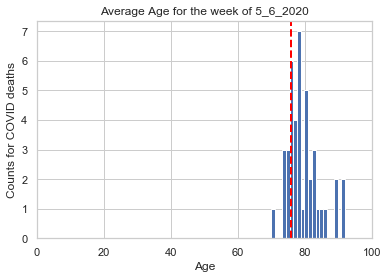

In [117]:
plt.hist(df_5_6_2020_avg, bins = 20)
plt.xlim(0,100)
plt.xlabel("Age")
plt.ylabel("Counts for COVID deaths")
plt.title('Average Age for the week of 5_6_2020')
plt.axvline(76.0, color='red', linestyle='dashed', linewidth=2)
plt.savefig('Fig3.png')
plt.show()

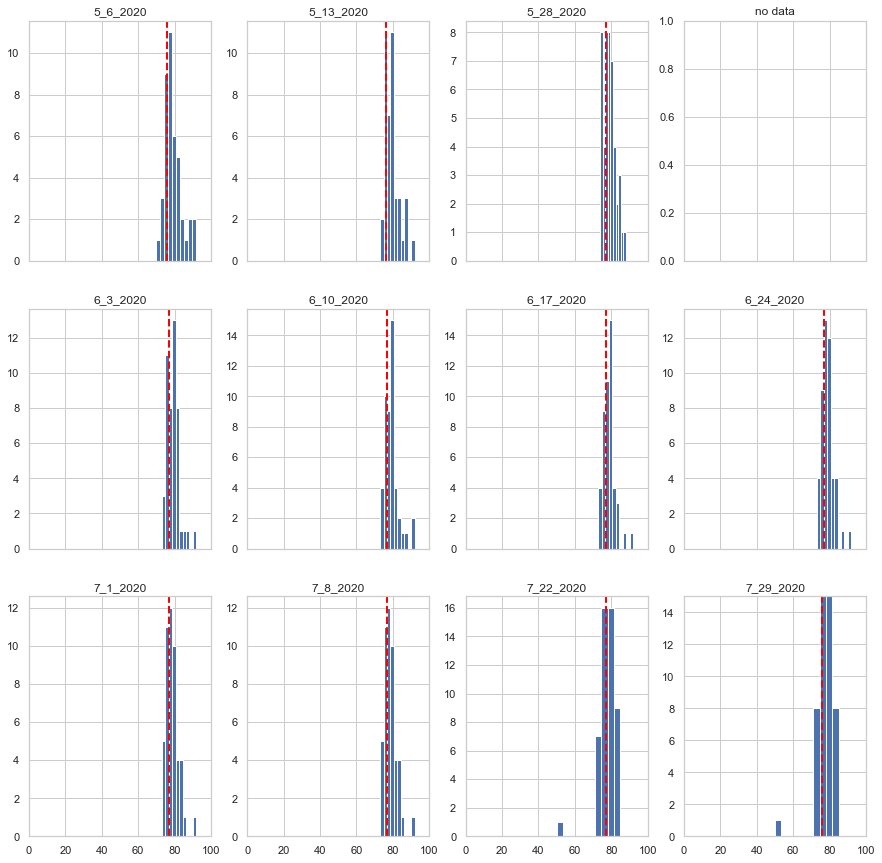

In [118]:
n_bins = 10

fig, ((ax0, ax1,ax2,ax3), (ax4, ax5,ax6,ax7),(ax8, ax9,ax10,ax11)) = plt.subplots(nrows=3, ncols=4,figsize=(15,15),sharex=True)
plt.xlim(0,100)
plt.ylim(0,15)
plt.title("COVID deaths average for different age group through 3 months")

ax0.hist(df_5_6_2020_avg, n_bins)
ax0.axvline(76.0, color='red', linestyle='dashed', linewidth=2)
ax0.set_title('5_6_2020')

ax1.hist(df_5_13_2020_avg, n_bins)
ax1.axvline(76.0, color='red', linestyle='dashed', linewidth=2)
ax1.set_title('5_13_2020')

ax2.hist(df_5_28_2020_avg, n_bins)
ax2.axvline(77.0, color='red', linestyle='dashed', linewidth=2)
ax2.set_title('5_28_2020')

#ax3.hist(df1_5_6_2020_median, n_bins, density=True, histtype='bar')
ax3.set_title('no data')

ax4.hist(df_6_3_2020_avg, n_bins)
ax4.axvline(77.0, color='red', linestyle='dashed', linewidth=2)
ax4.set_title('6_3_2020')

ax5.hist(df_6_10_2020_avg, n_bins)
ax5.axvline(77.0, color='red', linestyle='dashed', linewidth=2)
ax5.set_title('6_10_2020')

ax6.hist(df_6_17_2020_avg, n_bins)
ax6.axvline(77.0, color='red', linestyle='dashed', linewidth=2)
ax6.set_title('6_17_2020')

ax7.hist(df_6_24_2020_avg, n_bins)
ax7.axvline(77.0, color='red', linestyle='dashed', linewidth=2)
ax7.set_title('6_24_2020')

ax8.hist(df_7_1_2020_avg, n_bins)
ax8.axvline(77.0, color='red', linestyle='dashed', linewidth=2)
ax8.set_title('7_1_2020')

ax9.hist(df_7_8_2020_avg, n_bins)
ax9.axvline(77.0, color='red', linestyle='dashed', linewidth=2)
ax9.set_title('7_8_2020')

ax10.hist(df_7_22_2020_avg, n_bins)
ax10.axvline(77.0, color='red', linestyle='dashed', linewidth=2)
ax10.set_title('7_22_2020')

ax11.hist(df_7_29_2020_avg, n_bins)
ax11.axvline(76.0, color='red', linestyle='dashed', linewidth=2)
ax11.set_title('7_29_2020')

plt.savefig('Fig5.png')

In [119]:
# Will now check how the average deaths values has been changed through time 
# lets check the variability with every week 

In [120]:
#Let Two sample independent t test 
#H0= the average death is same through two weeks 
#Ha= the average death have changed through two weeks 

In [121]:
stats.ttest_ind(df_5_6_2020_avg,df_5_13_2020_avg, equal_var = False)

Ttest_indResult(statistic=0.0, pvalue=1.0)

In [122]:
# The t test fails to give a conclusion as t value is zero

In [123]:
stats.ttest_ind(df_5_6_2020_avg,df_5_28_2020_avg, equal_var = False)

Ttest_indResult(statistic=0.4451811037535436, pvalue=0.6575270842263122)

In [124]:
stats.ttest_ind(df_5_6_2020_avg,df_6_3_2020_avg, equal_var = False)

Ttest_indResult(statistic=0.5763833693362548, pvalue=0.5660941928892513)

In [125]:
stats.ttest_ind(df_5_6_2020_avg,df_6_10_2020_avg, equal_var = False)

Ttest_indResult(statistic=0.37667916541002333, pvalue=0.7074109975482787)

In [126]:
stats.ttest_ind(df_5_6_2020_avg,df_6_17_2020_avg, equal_var = False)

Ttest_indResult(statistic=0.7879952021429463, pvalue=0.4332637918223452)

In [127]:
stats.ttest_ind(df_5_6_2020_avg,df_6_24_2020_avg, equal_var = False)

Ttest_indResult(statistic=0.8935257889917665, pvalue=0.3744645039250296)

In [128]:
stats.ttest_ind(df_5_6_2020_avg,df_7_1_2020_avg, equal_var = False)

Ttest_indResult(statistic=1.1577736755021515, pvalue=0.250616234712623)

In [129]:
stats.ttest_ind(df_5_6_2020_avg,df_7_8_2020_avg, equal_var = False)

Ttest_indResult(statistic=1.1577736755021515, pvalue=0.250616234712623)

In [130]:
stats.ttest_ind(df_5_6_2020_avg,df_7_22_2020_avg, equal_var = False)

Ttest_indResult(statistic=1.9132322511594335, pvalue=0.05897261135734605)

In [131]:
stats.ttest_ind(df_5_6_2020_avg,df_7_29_2020_avg, equal_var = False)

Ttest_indResult(statistic=2.02892592690863, pvalue=0.0454902826086472)

In [132]:
# Here we did the t test for the week of 5_6_2020 to all the later weeks
# The results shows that for the immediate next week i.e 5_13_2020 the t test failed
# The following weeks of 5_28_2020, 6_3_2020, 6_10_2020, 6_17_2020, 6_24_2020, 7_1_2020, 7_8_2020 and 7_22_2020 the average deaths for different age groups did 
# changed as the p value is greater that 5% and accept the alternate hypothesis and cannot reject the null hypothesis

# For the week of 7_29_2020 the null hypothesis can be rejected as the p value is less than 5%, so we can say that 
#in recent months of July and August the average age for the COVID-19 deaths have changed. The outliers present in 
# in the week of 7_29_2020 is the specific reason for it. 

# Also the average death rates is higher in the month of June as compared to May  and July as can be seen from the graphs



In [133]:
# Lets check what are the outliers in the plot for 7_22_2020 and 7_29_2020

In [134]:
df_min=pd.DataFrame({"state":states_abb,"death":df10_avg})

In [135]:
print(df_min[df_min.death == df_min.death.min()])

   state  death
40    PR   50.0


In [136]:
df_min=pd.DataFrame({"state":states_abb,"death":df11_avg})

In [137]:
print(df_min[df_min.death == df_min.death.min()])

   state  death
40    PR   50.0


In [138]:
# The outliers in the plot for week 7_22_2020 and 7_9_2020 both belongs to Puerto Rico

In [139]:
#interactive plotting

In [140]:
df_interact=pd.DataFrame({"5_6_2020": df1_avg, "5_13_2020": df2_avg ,"5_28_2020": df3_avg ,
                          "6_3_2020": df4_avg ,"6_10_2020": df5_avg ,"6_17_2020":df6_avg,"6_24_2020":df7_avg,
                          "7_1_2020":df8_avg,"7_8_2020":df9_avg,"7_22_2020":df10_avg,"7_29_2020":df11_avg})

In [141]:
def plotyear(date):
    df_interact[date].plot.hist(bins=20)
    plt.axis(ymin=0,ymax=15,xmin=0,xmax=100)
    plt.xlabel('Age')
    plt.ylabel('Covid')

In [142]:
interact(plotyear,date=['5_6_2020','5_13_2020','6_3_2020','6_10_2020','6_17_2020','6_24_2020','7_1_2020','7_8_2020',
                        '7_22_2020','7_29_2020'])

interactive(children=(Dropdown(description='date', options=('5_6_2020', '5_13_2020', '6_3_2020', '6_10_2020', …

<function __main__.plotyear(date)>

In [143]:
df1_avg_=np.nan_to_num(df1_avg)
df2_avg_=np.nan_to_num(df2_avg)
df3_avg_=np.nan_to_num(df3_avg)
df4_avg_=np.nan_to_num(df4_avg)
df5_avg_=np.nan_to_num(df5_avg)
df6_avg_=np.nan_to_num(df6_avg)
df7_avg_=np.nan_to_num(df7_avg)
df8_avg_=np.nan_to_num(df8_avg)
df9_avg_=np.nan_to_num(df9_avg)
df10_avg_=np.nan_to_num(df10_avg)
df11_avg_=np.nan_to_num(df11_avg)

In [144]:
data1=abs(df1_avg_- df2_avg_)
data2=abs(df1_avg_- df3_avg_)
data3=abs(df1_avg_- df4_avg_)
data4=abs(df1_avg_- df5_avg_)
data5=abs(df1_avg_- df6_avg_)
data6=abs(df1_avg_- df7_avg_)
data7=abs(df1_avg_- df8_avg_)
data8=abs(df1_avg_- df9_avg_)
data9=abs(df1_avg_- df10_avg_)
data10=abs(df1_avg_- df11_avg_)


In [145]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [146]:
mean_confidence_interval(data1,confidence=0.95)

(0.7547169811320755, 0.3924765913635731, 1.116957370900578)

In [147]:
mean_confidence_interval(data2,confidence=0.95)

(7.490566037735849, 1.6291022333137333, 13.352029842157965)

In [148]:
mean_confidence_interval(data3,confidence=0.95)

(9.056603773584905, 2.444385549420547, 15.668821997749264)

In [149]:
mean_confidence_interval(data4,confidence=0.95)

(10.849056603773585, 3.5875031282572554, 18.110610079289913)

In [150]:
mean_confidence_interval(data5,confidence=0.95)

(10.754716981132075, 3.6733609402718166, 17.836073021992334)

In [151]:
mean_confidence_interval(data6,confidence=0.95)

(10.849056603773585, 3.7227636609048247, 17.975349546642345)

In [152]:
mean_confidence_interval(data7,confidence=0.95)

(10.88679245283019, 3.788794465878543, 17.984790439781836)

In [153]:
mean_confidence_interval(data8,confidence=0.95)

(10.88679245283019, 3.788794465878543, 17.984790439781836)

In [154]:
mean_confidence_interval(data9,confidence=0.95)

(11.641509433962264, 4.6372864532841875, 18.645732414640342)

In [155]:
mean_confidence_interval(data10,confidence=0.95)

(11.641509433962264, 4.668017249022235, 18.615001618902294)

In [156]:
#The variation in the average value through May to July has ranged from 0.7 years to 10 years. So we can say although the report of COVID infections has been 
#reported fo rthe young age the deaths average value remain around 77 years 

# we could do the analysis by removing Puerto Rico value

In [157]:
df10_avg_no_PR=np.delete(df10_avg_,40)
df11_avg_no_PR=np.delete(df11_avg_,40)

In [158]:
df1_avg_no_PR=np.delete(df1_avg_,40)

In [159]:
data9_no_PR=abs(df1_avg_no_PR - df10_avg_no_PR)
data10_no_PR=abs(df1_avg_no_PR - df11_avg_no_PR)

In [160]:
mean_confidence_interval(data9_no_PR,confidence=0.95)

(10.903846153846153, 3.921617417206173, 17.886074890486135)

In [161]:
mean_confidence_interval(data10_no_PR,confidence=0.95)

(10.903846153846153, 3.953687169845618, 17.854005137846688)

In [162]:
#This confirms the above hypothesis and with 95% confidence we can that the significance of a shift over time,
# for age magnitude lies between 0.7 years to 10 years .